# Seminar 4. Classification & Cross-validation

## Remar on HomeWorks

<div style="width:50%; text-align:center">
<img src="https://4.bp.blogspot.com/-0cbXveb1J_0/V-FtjJZ4rqI/AAAAAAAAMHM/bS32Pio2a1IFOyp5T86S0jiyB-3KAN1iwCEw/s1600/download%2B%25281%2529.png" width=500px>
</div>
What's the difference between Data Science and Machine Learning?

# Examples of supervised DS problems

## Iris Data Set
https://archive.ics.uci.edu/ml/datasets/Iris

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant

This is perhaps the best known database to be found in the pattern recognition literature. 

Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) 




** Inputs // Features // X**: Flower sizes  
  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  
<div style="width:25%; text-align:center">
<img src="http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png" width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

** Output // Target // Y**: Type of iris plant
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica
 
<div style="width:100%; text-align:center">
<img src="http://articles.concreteinteractive.com/wp-content/uploads/2015/03/irises.png" width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

##  Shuttle Landing Control Data Set
https://archive.ics.uci.edu/ml/datasets/Shuttle+Landing+Control

Determining the conditions under which an autolanding would be preferable to manual control of the spacecraft.

<div style="width:30%; text-align:center">
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large92.jpg" width=500px>
</div>

** Inputs // Features // X**: Flight conditions  

2. STABILITY: stab, xstab 
3. ERROR: XL, LX, MM, SS 
4. SIGN: pp, nn 
5. WIND: head, tail 
6. MAGNITUDE: Low, Medium, Strong, OutOfRange 
7. VISIBILITY: yes, no



** Output // Target // Y**: Type of control

Auto or manual landing


## Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

Classes: 
 - c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
 - c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
 - c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
 - c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

 - t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
 - t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
 - t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
 - t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

** Inputs // Features // X**: the expression levels of 77 proteins 

** Output // Target // Y**: Control or trisomy

## Exploring the *Titanic* dataset (continued)

<div style="width:100%; text-align:center">
<img src="http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" width=500px>
</div>

Kaggle has a nice [dataset](https://www.kaggle.com/c/titanic-gettingStarted) with information about passengers on the *Titanic*. It's meant as an introduction to predictive models -- here, predicting who survived the sinking. Let's explore it using [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). This notebook mostly demonstrates features in development for version 0.3. Please [get in touch](https://github.com/mwaskom/seaborn/issues/new) if you have ideas for how they could be improved.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)
titanic["sex"] = titanic.sex.map({"male":0, "female":1})
titanic = pd.get_dummies(titanic, dummy_na=True, columns=['embarked',])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = titanic.drop('survived', axis=1)
y = titanic.survived

In [5]:
clf = KNeighborsClassifier()
clf.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
print(X.count())

pclass          891
sex             891
age             714
sibsp           891
parch           891
fare            891
embarked_C      891
embarked_Q      891
embarked_S      891
embarked_nan    891
dtype: int64


In [7]:
# we have to remove NaN
X.dropna(axis=0, inplace=True)
print(X.count())
y = y[X.index].values

pclass          714
sex             714
age             714
sibsp           714
parch           714
fare            714
embarked_C      714
embarked_Q      714
embarked_S      714
embarked_nan    714
dtype: int64


In [8]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_predicted = clf.predict(X)
print('Accuracy of prediction is {}'.format(accuracy_score(y, y_predicted)))

Accuracy of prediction is 0.9831932773109243


#### Bias-variance tradeoff

<div style="width:100%; text-align:center">
<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" width=500px>
</div>

Check a great tutorial http://scott.fortmann-roe.com/docs/BiasVariance.html

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_train)
print('Accuracy of prediction on train set is {}'.format(accuracy_score(y_train, y_predicted)))

Accuracy of prediction on train set is 0.9937238493723849


In [10]:
y_predicted = clf.predict(X_test)
print('Accuracy of prediction on test set is {}'.format(accuracy_score(y_test, y_predicted)))

Accuracy of prediction on test set is 0.6779661016949152


### Lets try to reproduce model complexity curves
What is a measure of complexity for KNeighborsClassifier?

Text(0,0.5,'Accuracy of prediction')

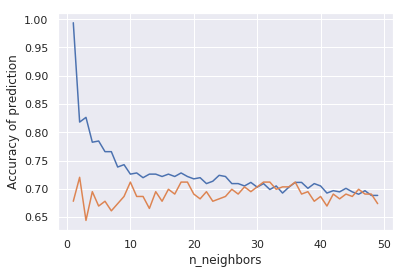

In [11]:
train_error, test_error = [], []
neighbors_range = range(1, 50)
for n_neighbors in neighbors_range:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_error.append(accuracy_score(y_train, clf.predict(X_train)))
    test_error.append(accuracy_score(y_test, clf.predict(X_test)))
plt.plot(neighbors_range, train_error)
plt.plot(neighbors_range, test_error)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy of prediction')

# Brief intro to classification algorithms

In [12]:
import seminar4_utils as utils # plot functions

ImportError: No module named 'sklearn.cross_validation'

## Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
utils.plot_clf(LogisticRegression())

NameError: name 'utils' is not defined

## Sparcity

<div style="width:60%; text-align:center">
<img src="https://1.bp.blogspot.com/-tXq6Nl2lcNg/V3qzttiZ4sI/AAAAAAAAN_M/6nmjgwydWJUy5Kqt9gFg2Nb12BCTcD4ogCLcB/s1600/LASSO.png">
</div>

In [ ]:
utils.plot_clf(LogisticRegression(C=1e-1, penalty='l1'))

## Support vector machine

In [ ]:
from sklearn.svm import SVC # SVC means Support Vector Classifier
utils.plot_clf(SVC(kernel='linear'))

** Kernel trick**. Main idea
* SVM builds a linear decision boundary in a feature space
* Some problems cannot be solved by a linear method (Problem 1 above)
* But what if we somehow transform our feature space?
* For example, use $x_1^2,\; x_1 x_2, \; x_2^2$ as features?

In [ ]:
# reload(utils)
utils.plot_clf(SVC(kernel='poly', degree=2))

#### We can even use infinite-dimensional vector spaces!

In [ ]:
utils.plot_clf(SVC(kernel='rbf'))

#  Example: Mice classification

## Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

TODO: 1. Import pandas

TODO: 2. Load the Mice data set (check out *pd.read_* functions) and have a look at it

*tip*: add index_col='MouseID' to your reading function to use Mouse Id as an index

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'


TODO: 3. Identify features (X) and targets (y)

TODO: 4. Split your data into X and y

*tip* you can assign data to X and drop unnecessary columns via drop() method

TODO: 5. Decode Genotype: Control as 0, Ts65Dn as 1
    
*tip* example from the titanic dataset: sex decoding

titanic.sex = titanic.sex.map({"male":0, "female":1})

TODO: 6. Check NA values via count() and then drop columns with NaNs via dropna()

*tip* check that you specify the correct axes to drop columns (and not rows)

# Cross-validation

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# LogisticRegressionCV automatically select regularization parameter C

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)
print('Accuracy when trained on all dataset', accuracy_score(clf.predict(X), y))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = None, random_state = 0)

# TODO: 7. Fit on train set & estimate accuracy on the test set
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy on a test subset', accuracy_score(y_pred, y_test))
# error is a little bit higher

## Kfolds CV

Example of 5-fold

<div style="width:60%; text-align:center">
<img src="http://vinhkhuc.github.io/assets/2015-03-01-cross-validation/5-fold-cv.png">
</div>

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# KFold split your data
# cross_val_score automatically builds K models and then estimates errors on the corresponding test sets

In [ ]:
kfold = KFold(n_splits=5) # 5-fold CV
cv = kfold.split(X, y) # show data & make the split

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

#### Wow! Significant drop in accuracy and rise in std across folds.  The reason is that the labels are ordered

In [ ]:
# TODO: 7. Check the order of the labels
y

In [ ]:
# TODO: 8. Try KFold with shuffle=True 
kfold = KFold(n_splits=5, shuffle=True) # 5-fold CV
cv = kfold.split(X, y) # show data & make the split

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

#### So, we restore our good accuracy 

## Label (Group) split

#### We have 15 measurments per mouse in the dataset, and our validation scheme doesn't take this fact into account. Let's fix that using group split

In [ ]:
# 15 measurments for the same mouse seem to be correlated
X.head(20)

In [ ]:
# generate a list of mice_ids
mice_id = X.index.map(lambda x: x.split('_')[0])
mice_id

In [ ]:
from sklearn.model_selection import GroupKFold
# GroupKFold allows to put all points with coincident labels into the single set (training one or validation one) 

In [ ]:
group_kfold = GroupKFold(n_splits=5)
cv = group_kfold.split(X, y, groups=mice_id) #we explicitly define our groups using mice_id

scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('LabelKFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

#### Classification accuracy is dropped. The reason is that there is no leak in our data anymore - we can't use data from "validation" mice during training

## Cross-validation: summary
- Do not estimate accuracy on the train set, use a separate validation set
- If your labels are ordered, don't forget to shuffle your data
- If you have any groups in your dataset, you have to use GroupKFold to estimate quality of your model

# Metrics for classification accuracy

## Precision & Recall
A wonderfull picture from Wikipedia
<div style="width:75%; text-align:center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width=500px>
</div>


F1 = 2 \* (precision \* recall) / (precision + recall)

In [ ]:
from sklearn.cross_validation import cross_val_predict
# cross_val_predict internally do KFold cross-validation, calculate predictions on validation sets
# and then merge predictions into a single vector of predictions
from sklearn.metrics import classification_report
#classification_report gives several quality metrics. It can be used for multiclass problems

y_pred = cross_val_predict(LogisticRegressionCV(), X, y)
print(classification_report(y, y_pred))

# Let us explore precision & recall

<div style="width:100%; text-align:center">
<img src="./binary_classification.png">
</div>

##  SECOM Data Set
https://archive.ics.uci.edu/ml/datasets/SECOM

Data from a semi-conductor manufacturing process


In [ ]:
# download inputs
import pandas as pd
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
X = pd.read_csv(path, sep=' ', header=None)

In [ ]:
# We have several points with large number of NAs. Here we drop them
print(X.shape)
X.dropna(thresh=550, axis=0, inplace=True)
print(X.shape)
# drop columns with any NaN
X.dropna(axis=1, inplace=True)
print(X.shape)

In [ ]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
y = pd.read_csv(path, sep=' ', header=None)[0]
y = y[X.index]
y = y == 1

In [ ]:
y.value_counts()

#### TODO 1:
 - Import from sklearn.metrics accuracy, precision and recall scores; 
 - also import train_test_split from cross_validation 
 - split data into train & test parts

#### TODO 2: estimate Precision, Recall on train set


#### TODO 3: estimate Accuracy, Precision, Recall on test set


#### Awful results on the test set. Any ideas?

#### Probably, we can select better value of regularization parameter C
#### TODO 4: replace LogisticRegression by LogisticRegressionCV & check the results


In [ ]:
#### No progress

In [ ]:
#### But, components of our data have significantly different ranges

In [ ]:
X.max(0) - X.min(0)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(), LogisticRegressionCV(scoring='recall'))

# TODO 5: estimate quality metrics on both train and test sets

# Links
 - [A blog post on cross validation](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html)
 - Also, check out two other posts from the same series "Model evaluation, model selection, and algorithm selection in machine learning": [The basics](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) and [Bootstrapping and uncertainties](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html)